# Python Mini Project - Stock Prediction Using Python

In [1]:
# First step is to install the yfinance package to fetch dataset of the various stocks: "Amazon, Microsoft, Apple, Google"
#! pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [310]:
# Importing packages
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
# importing datetime module for further processess
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2023, 6, 2, 0, 13, 41, 336679)

In [312]:
# Creating variables which contain ticker symbol of given companies
ticker1 = "AMZN"
ticker2 = "MSFT"
ticker3 = "GOOG"
ticker4 = "AAPL"

In [313]:
# Providing start and end date to fetch data from a particular time period.
# Here, we are taking last 5 years of data
start_date = datetime(now.year-4,3,now.day)
end_date = datetime(now.year,5,now.day)

AMZN = yf.download(ticker1, start_date, end_date)
MSFT = yf.download(ticker2, start_date, end_date)
GOOG = yf.download(ticker3, start_date, end_date)
AAPL = yf.download(ticker4, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Displaying Datasets

In [314]:
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-04,84.250000,85.471497,83.718002,84.808502,84.808502,123348000
2019-03-05,85.147499,85.389999,84.450500,84.621498,84.621498,73630000
2019-03-06,84.798500,84.887497,83.414001,83.447502,83.447502,79920000
2019-03-07,83.368500,83.487503,81.025497,81.297501,81.297501,99140000
2019-03-08,80.200500,81.136002,79.328499,81.040001,81.040001,93340000


In [315]:
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-04,113.019997,113.250000,110.800003,112.260002,107.501472,26608000
2019-03-05,112.250000,112.389999,111.230003,111.699997,106.965179,19538300
2019-03-06,111.870003,112.660004,111.430000,111.750000,107.013077,17687000
2019-03-07,111.400002,111.550003,109.870003,110.389999,105.710716,25339000
2019-03-08,109.160004,110.709999,108.800003,110.510002,105.825615,22818400


In [316]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-04,57.349499,57.914001,56.534500,57.389999,57.389999,28920000
2019-03-05,57.502998,58.480499,57.309750,58.101501,58.101501,28864000
2019-03-06,58.124500,58.378300,57.774502,57.893002,57.893002,21986000
2019-03-07,57.785999,57.837749,56.745499,57.165001,57.165001,23332000
2019-03-08,56.336498,57.354000,56.165001,57.116001,57.116001,24248000


In [317]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-04,43.922501,44.437500,43.492500,43.962502,42.489784,109744800
2019-03-05,43.985001,44.000000,43.634998,43.882500,42.412460,78949600
2019-03-06,43.667500,43.872501,43.485001,43.630001,42.168423,83241600
2019-03-07,43.467499,43.610001,43.005001,43.125000,41.680340,99185600
2019-03-08,42.580002,43.267502,42.375000,43.227501,41.779408,95997600


# Data Cleaning:

In [318]:
# Checking for any null values in all datasets
AMZN.isna().sum()
MSFT.isna().sum()
GOOG.isna().sum()
AAPL.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [319]:
# Checking for any duplicated entries
AMZN.duplicated().sum()
MSFT.duplicated().sum()
GOOG.duplicated().sum()
AAPL.duplicated().sum()

0

### We found zero null and duplicated entries

# Task 1: Change in stock price overtime

### Change in Amazon's stocks price overtime

In [320]:
AMZN["ChangeInStock"] = AMZN["Open"] - AMZN["Close"]
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume,ChangeInStock
Date,,,,,,,
2019-03-04,84.250000,85.471497,83.718002,84.808502,84.808502,123348000,-0.558502
2019-03-05,85.147499,85.389999,84.450500,84.621498,84.621498,73630000,0.526001
2019-03-06,84.798500,84.887497,83.414001,83.447502,83.447502,79920000,1.350998
2019-03-07,83.368500,83.487503,81.025497,81.297501,81.297501,99140000,2.070999
2019-03-08,80.200500,81.136002,79.328499,81.040001,81.040001,93340000,-0.839500


In [321]:
print("Change in Amazon's stock price overtime:",abs(AMZN["ChangeInStock"]).sum()/AMZN.shape[0])

Change in Amazon's stock price overtime: 1.7005410571684714


### Change in Microsoft's stocks price overtime

In [322]:
MSFT["ChangeInStock"] = MSFT["Open"] - MSFT["Close"]
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume,ChangeInStock
Date,,,,,,,
2019-03-04,113.019997,113.250000,110.800003,112.260002,107.501472,26608000,0.759995
2019-03-05,112.250000,112.389999,111.230003,111.699997,106.965179,19538300,0.550003
2019-03-06,111.870003,112.660004,111.430000,111.750000,107.013077,17687000,0.120003
2019-03-07,111.400002,111.550003,109.870003,110.389999,105.710716,25339000,1.010002
2019-03-08,109.160004,110.709999,108.800003,110.510002,105.825615,22818400,-1.349998


In [323]:
print("Change in Microsoft's stock price overtime:", abs(MSFT['ChangeInStock']).sum()/MSFT.shape[0])

Change in Microsoft's stock price overtime: 2.503164576847742


### Change in Google's stocks price overtime

In [324]:
GOOG["ChangeInStock"] = GOOG["Open"] - GOOG["Close"]
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume,ChangeInStock
Date,,,,,,,
2019-03-04,57.349499,57.914001,56.534500,57.389999,57.389999,28920000,-0.040501
2019-03-05,57.502998,58.480499,57.309750,58.101501,58.101501,28864000,-0.598503
2019-03-06,58.124500,58.378300,57.774502,57.893002,57.893002,21986000,0.231499
2019-03-07,57.785999,57.837749,56.745499,57.165001,57.165001,23332000,0.620998
2019-03-08,56.336498,57.354000,56.165001,57.116001,57.116001,24248000,-0.779503


In [325]:
print("Change in Google's stock price overtime:", abs(GOOG['ChangeInStock']).sum()/GOOG.shape[0])

Change in Google's stock price overtime: 1.092149179929546


### Change in Apple's stocks price overtime

In [326]:
AAPL["ChangeInStock"] = AAPL["Open"] - AAPL["Close"]
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,ChangeInStock
Date,,,,,,,
2019-03-04,43.922501,44.437500,43.492500,43.962502,42.489784,109744800,-0.040001
2019-03-05,43.985001,44.000000,43.634998,43.882500,42.412460,78949600,0.102501
2019-03-06,43.667500,43.872501,43.485001,43.630001,42.168423,83241600,0.037498
2019-03-07,43.467499,43.610001,43.005001,43.125000,41.680340,99185600,0.342499
2019-03-08,42.580002,43.267502,42.375000,43.227501,41.779408,95997600,-0.647499


In [327]:
print("Change in Apple's stock price overtime:", abs(AAPL['ChangeInStock']).sum()/AAPL.shape[0])

Change in Apple's stock price overtime: 1.4499739327808012


# Task 2: Visualization of change in a stock's volume traded, over time

### Change in Amazon's stock volume being traded overtime

<Axes: title={'center': "Change in Amazon's stocks volume traded overtime"}, xlabel='Date'>

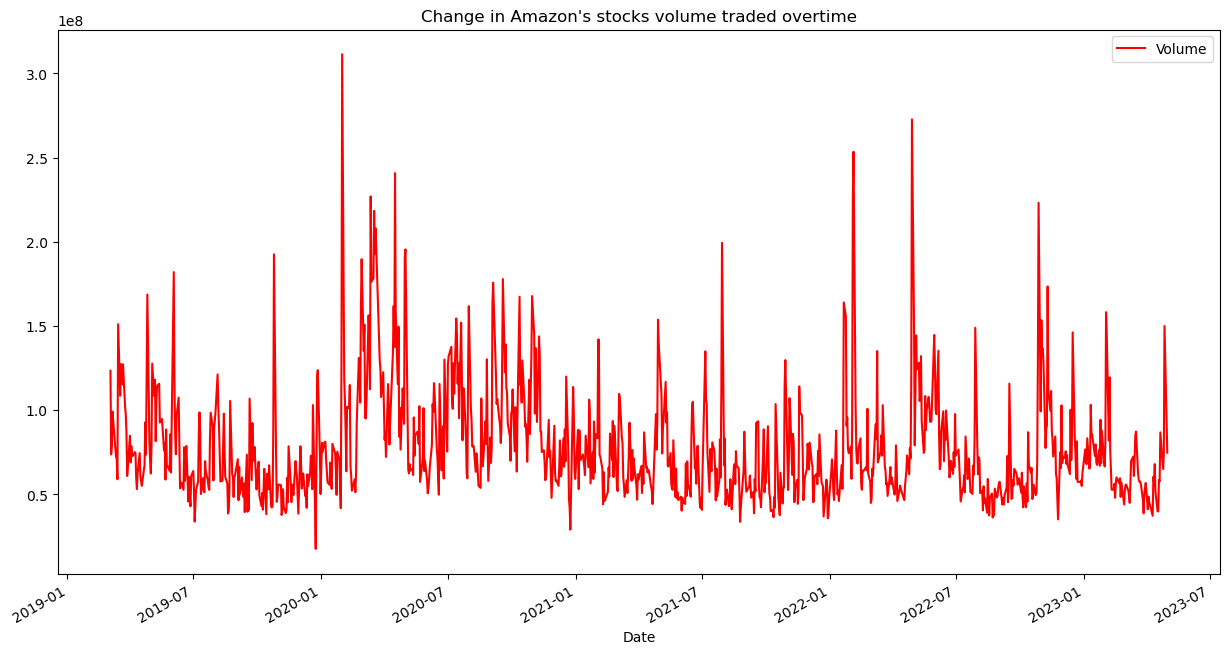

In [328]:
AMZN["Volume"].plot(legend = True, figsize = (15,8), color = "red", title = "Change in Amazon's stocks volume traded overtime")

### Change in Microsoft's stock volume being traded overtime

<Axes: title={'center': "Change in Microsoft's stocks volume traded overtime"}, xlabel='Date'>

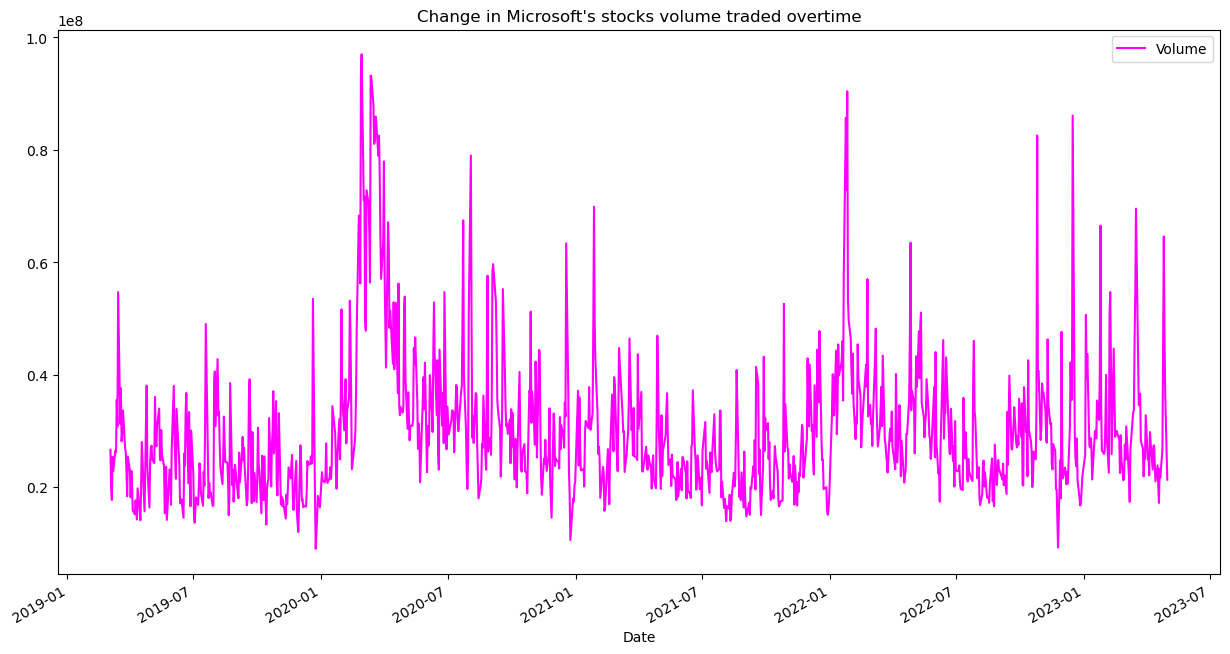

In [329]:
MSFT["Volume"].plot(legend = True, figsize = (15,8), color = "magenta", title = "Change in Microsoft's stocks volume traded overtime")

### Change in Google's stock volume being traded overtime

<Axes: title={'center': "Change in Google's stocks volume traded overtime"}, xlabel='Date'>

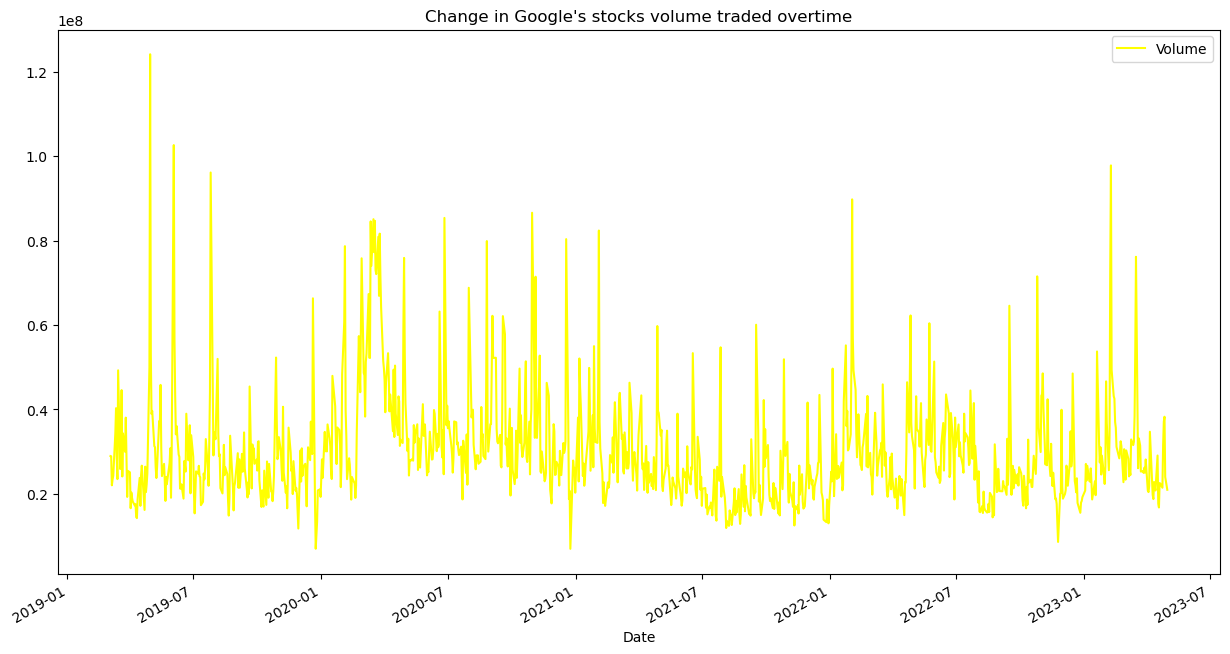

In [330]:
GOOG["Volume"].plot(legend = True, figsize = (15,8), color = "yellow", title = "Change in Google's stocks volume traded overtime")

### Change in Apple's stock volume being traded overtime

<Axes: title={'center': "Change in Apple's stocks volume traded overtime"}, xlabel='Date'>

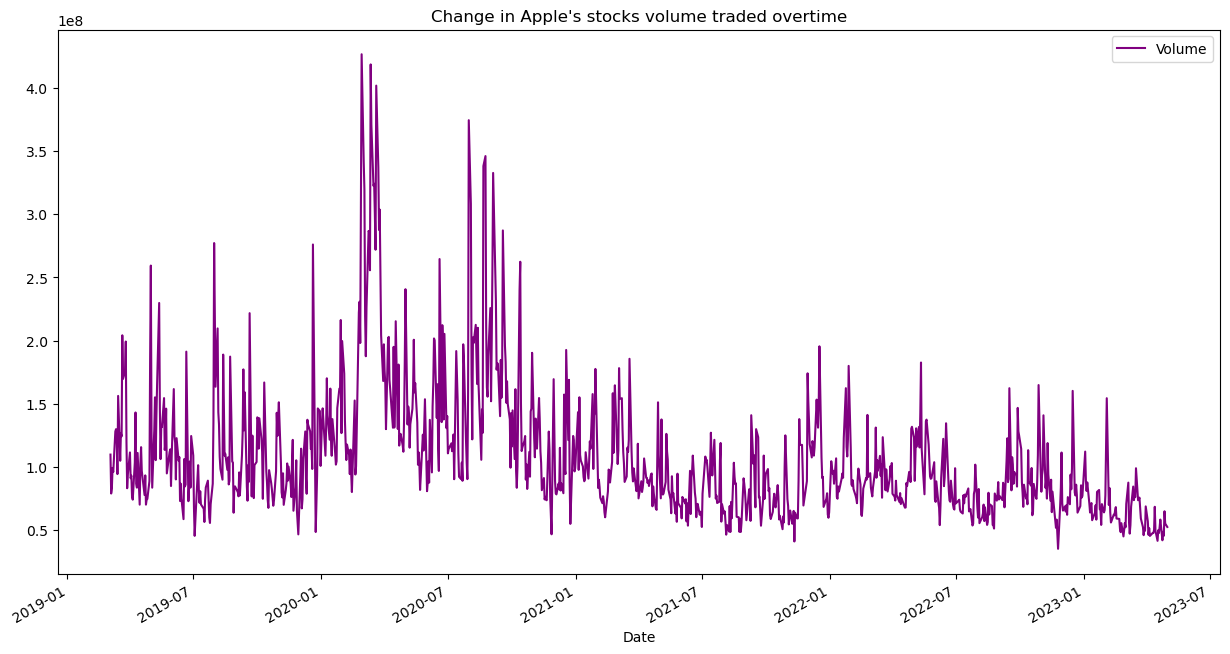

In [331]:
AAPL["Volume"].plot(legend = True, figsize = (15,8), color = "purple", title = "Change in Apple's stocks volume traded overtime")

# Task 3: Moving average of Stocks

In [332]:
# Reading CSV files

AmznStock = pd.read_csv("amzn.csv")
#AmznStock

MsftStock = pd.read_csv("msft.csv")
#MsftStock

GoogStock = pd.read_csv("goog.csv")
#GoogStock

AaplStock = pd.read_csv("aapl.csv")
#AaplStock

### Moving average of Amazon's stock:

In [333]:
x = 0
y = 4
sum_ma_amzn = 0
ma_amzn = []   #empty list to catch values in it.

# Taking index value and using it to store values in empty list one after the other
for i in AmznStock.index:  
    ma_amzn.append(AmznStock.loc[x : y, 'Open'].sum()/5)
    sum_ma_amzn += AmznStock.loc[x : y, 'Open'].sum()/5  # storing sum of moving average
    x += 1  #incremetation steps
    y += 1

In [334]:
# Creating a new column
ma_amzn
AmznStock["moving_avg"] = ma_amzn
AmznStock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,moving_avg
0,2019-03-01,82.756500,83.712997,82.550003,83.586502,83.586502,99498000,84.064200
1,2019-03-04,84.250000,85.471497,83.718002,84.808502,84.808502,123348000,83.553000
2,2019-03-05,85.147499,85.389999,84.450500,84.621498,84.621498,73630000,82.964200
3,2019-03-06,84.798500,84.887497,83.414001,83.447502,83.447502,79920000,82.624699
4,2019-03-07,83.368500,83.487503,81.025497,81.297501,81.297501,99140000,82.495000


<Axes: >

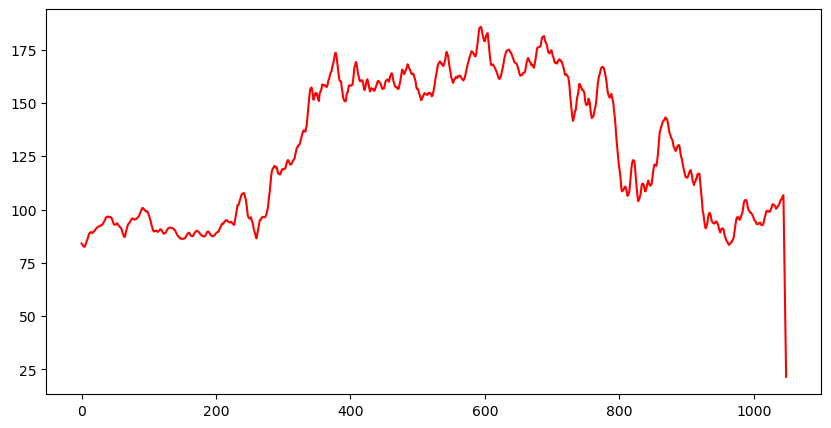

In [335]:
AmznStock["moving_avg"].plot(figsize = (10,5), color = "red")

In [336]:
print("The moving average of Amazon's stock was: ", sum_ma_amzn/AmznStock.shape[0])

The moving average of Amazon's stock was:  128.52228371153797


## Daily return average of a Amazon's stock:

In [337]:
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume,ChangeInStock
Date,,,,,,,
2019-03-04,84.250000,85.471497,83.718002,84.808502,84.808502,123348000,-0.558502
2019-03-05,85.147499,85.389999,84.450500,84.621498,84.621498,73630000,0.526001
2019-03-06,84.798500,84.887497,83.414001,83.447502,83.447502,79920000,1.350998
2019-03-07,83.368500,83.487503,81.025497,81.297501,81.297501,99140000,2.070999
2019-03-08,80.200500,81.136002,79.328499,81.040001,81.040001,93340000,-0.839500


In [338]:
print("The daily retun average of Amazon's stock was: ", abs(AMZN["ChangeInStock"]).sum()/AMZN.shape[0])

The daily retun average of Amazon's stock was:  1.7005410571684714


## Adding a new column ‘Trend’ whose values are based on the 'Daily Return'

In [339]:
# Resetting the indexes again to have numbers as indexes
# instead of dealing Datetime indexers problem in the further processes
AMZN.reset_index(inplace=True, drop=False)
AMZN.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ChangeInStock
0,2019-03-04,84.250000,85.471497,83.718002,84.808502,84.808502,123348000,-0.558502
1,2019-03-05,85.147499,85.389999,84.450500,84.621498,84.621498,73630000,0.526001
2,2019-03-06,84.798500,84.887497,83.414001,83.447502,83.447502,79920000,1.350998
3,2019-03-07,83.368500,83.487503,81.025497,81.297501,81.297501,99140000,2.070999
4,2019-03-08,80.200500,81.136002,79.328499,81.040001,81.040001,93340000,-0.839500


In [340]:
AMZN.rename(columns = {"ChangeInStock" : "Trend"}, inplace = True)
AMZN.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Trend
0,2019-03-04,84.250000,85.471497,83.718002,84.808502,84.808502,123348000,-0.558502
1,2019-03-05,85.147499,85.389999,84.450500,84.621498,84.621498,73630000,0.526001
2,2019-03-06,84.798500,84.887497,83.414001,83.447502,83.447502,79920000,1.350998
3,2019-03-07,83.368500,83.487503,81.025497,81.297501,81.297501,99140000,2.070999
4,2019-03-08,80.200500,81.136002,79.328499,81.040001,81.040001,93340000,-0.839500


In [341]:
import numpy as np

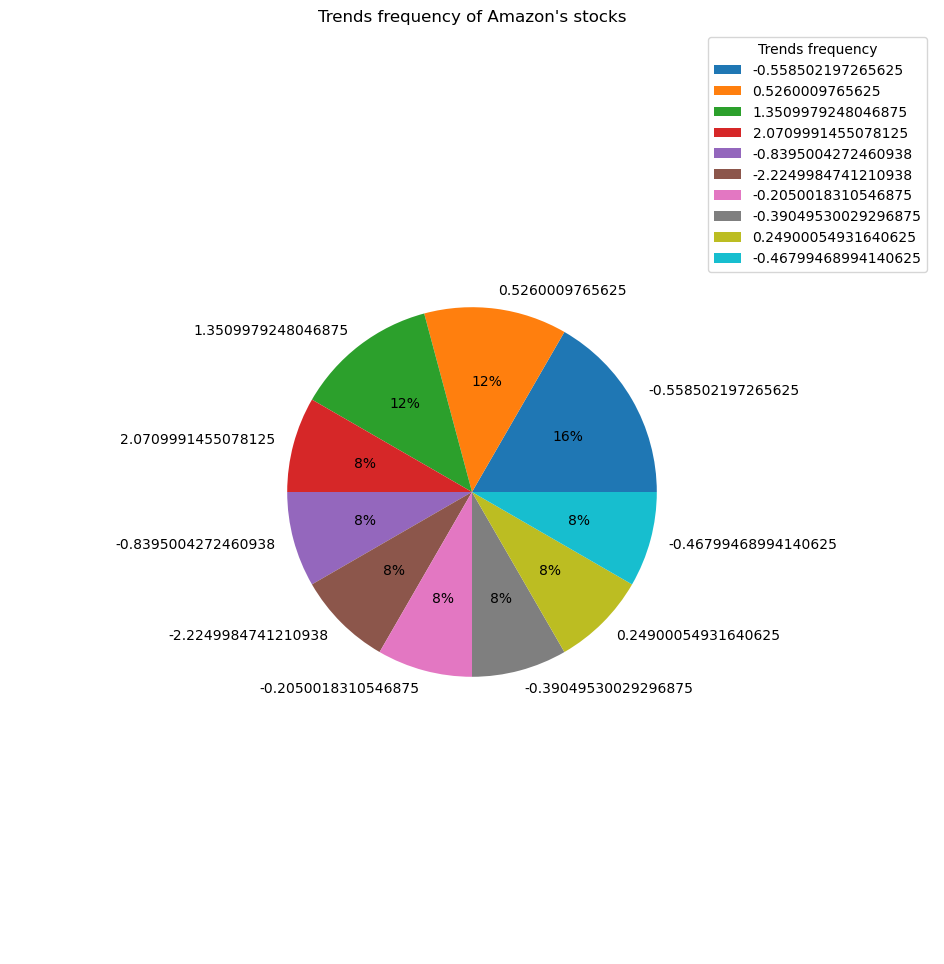

In [342]:
# Visualizing frequency of Trend in Amazon's stock
plt.figure(figsize = (20,12))
plt.pie(np.array(AMZN["Trend"].value_counts())[0:10], labels = AMZN["Trend"].loc[0:9], autopct='%i%%', radius=0.5)
plt.title("Trends frequency of Amazon's stocks")
plt.legend(title = "Trends frequency")
plt.show()

### Moving average of Microsoft's stock:

In [343]:
x = 0
y = 4
sum_ma_msft = 0
ma_msft = []   #empty list to catch values in it.

# Taking index value and using it to store values in empty list
for i in MsftStock.index:  
    ma_msft.append(MsftStock.loc[x : y, 'Open'].sum()/5)
    sum_ma_msft += MsftStock.loc[x : y, 'Open'].sum()/5  # storing sum of ma
    x += 1
    y += 1

In [344]:
# Creating a new column
ma_msft
MsftStock["moving_avg"] = ma_msft
MsftStock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,moving_avg
0,2019-07-22,137.410004,139.190002,137.330002,138.429993,133.052841,25074900,139.373996
1,2019-07-23,139.759995,139.990005,138.029999,139.289993,133.879425,18034600,140.191995
2,2019-07-24,138.899994,140.740005,138.850006,140.720001,135.253922,20738300,140.267996
3,2019-07-25,140.429993,140.610001,139.320007,140.190002,134.744476,18356900,140.553998
4,2019-07-26,140.369995,141.679993,140.300003,141.339996,135.849792,19037600,139.867999


<Axes: >

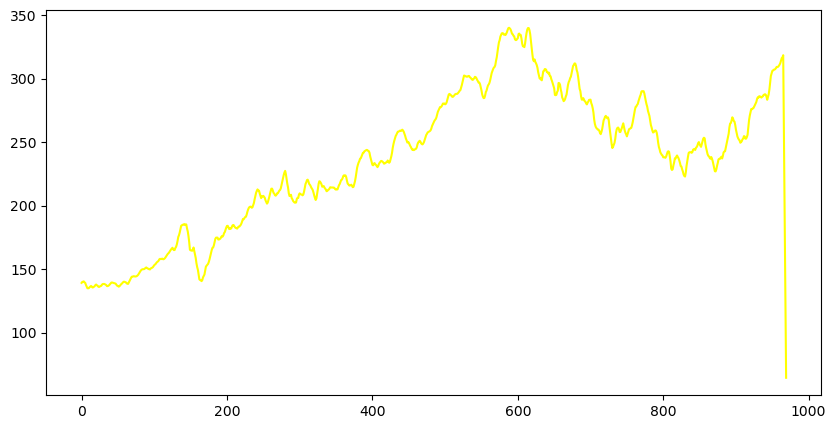

In [345]:
MsftStock["moving_avg"].plot(figsize = (10,5), color = "yellow")

In [346]:
print("The moving average of Microsoft's stock is: ", sum_ma_msft/MsftStock.shape[0])

The moving average of Microsoft's stock is:  236.08808244213614


## Daily return average of a Microsoft's stock:

In [347]:
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume,ChangeInStock
Date,,,,,,,
2019-03-04,113.019997,113.250000,110.800003,112.260002,107.501472,26608000,0.759995
2019-03-05,112.250000,112.389999,111.230003,111.699997,106.965179,19538300,0.550003
2019-03-06,111.870003,112.660004,111.430000,111.750000,107.013077,17687000,0.120003
2019-03-07,111.400002,111.550003,109.870003,110.389999,105.710716,25339000,1.010002
2019-03-08,109.160004,110.709999,108.800003,110.510002,105.825615,22818400,-1.349998


In [348]:
print("The daily retun average of Microsoft's stock is: ", abs(MSFT["ChangeInStock"]).sum()/MSFT.shape[0])

The daily retun average of Microsoft's stock is:  2.503164576847742


## Adding a new column ‘Trend’ whose values are based on the 'Daily Return'

In [349]:
# Resetting the indexes again to have numbers 
# instead of dealing Datetime indexers problem in the further processes
MSFT.reset_index(inplace=True, drop=False)
MSFT.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ChangeInStock
0,2019-03-04,113.019997,113.250000,110.800003,112.260002,107.501472,26608000,0.759995
1,2019-03-05,112.250000,112.389999,111.230003,111.699997,106.965179,19538300,0.550003
2,2019-03-06,111.870003,112.660004,111.430000,111.750000,107.013077,17687000,0.120003
3,2019-03-07,111.400002,111.550003,109.870003,110.389999,105.710716,25339000,1.010002
4,2019-03-08,109.160004,110.709999,108.800003,110.510002,105.825615,22818400,-1.349998


In [350]:
MSFT.rename(columns = {"ChangeInStock" : "Trend"}, inplace = True)
MSFT.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Trend
0,2019-03-04,113.019997,113.250000,110.800003,112.260002,107.501472,26608000,0.759995
1,2019-03-05,112.250000,112.389999,111.230003,111.699997,106.965179,19538300,0.550003
2,2019-03-06,111.870003,112.660004,111.430000,111.750000,107.013077,17687000,0.120003
3,2019-03-07,111.400002,111.550003,109.870003,110.389999,105.710716,25339000,1.010002
4,2019-03-08,109.160004,110.709999,108.800003,110.510002,105.825615,22818400,-1.349998


In [351]:
import numpy as np

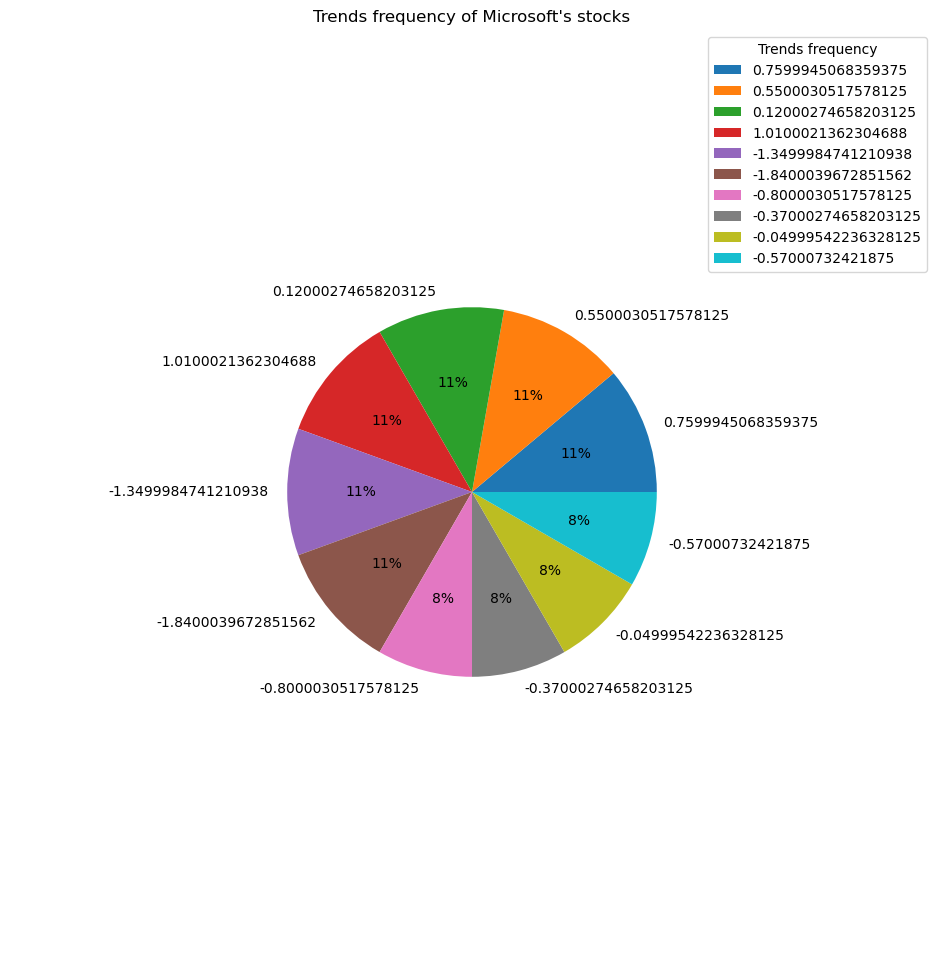

In [352]:
# Visualizing frequency of Trend in Microsoft's stock
plt.figure(figsize = (20,12))
plt.pie(np.array(MSFT["Trend"].value_counts())[0:10], labels = MSFT["Trend"].loc[0:9], autopct='%i%%', radius=0.5)
plt.title("Trends frequency of Microsoft's stocks")
plt.legend(title = "Trends frequency")
plt.show()

### Moving average of Google's stock:

In [353]:
x = 0
y = 4
sum_ma_goog = 0
ma_goog = []   #empty list to catch values in it.

# Taking index value and using it to store values in empty list
for i in GoogStock.index:  
    ma_goog.append(GoogStock.loc[x : y, 'Open'].sum()/5)
    sum_ma_goog += GoogStock.loc[x : y, 'Open'].sum()/5  # storing sum of ma
    x += 1
    y += 1

In [354]:
# Creating a new column
ma_goog
GoogStock["moving_avg"] = ma_goog
GoogStock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,moving_avg
0,2019-07-22,56.672501,56.962502,56.212002,56.903500,56.903500,26030000,57.712100
1,2019-07-23,57.200001,57.345001,56.590000,57.310501,57.310501,21874000,58.788100
2,2019-07-24,56.595001,57.200001,56.349499,56.890499,56.890499,31796000,59.602200
3,2019-07-25,56.890999,57.084999,56.046001,56.605999,56.605999,44196000,60.513200
4,2019-07-26,61.202000,63.277500,61.200001,62.520500,62.520500,96116000,61.275301


<Axes: >

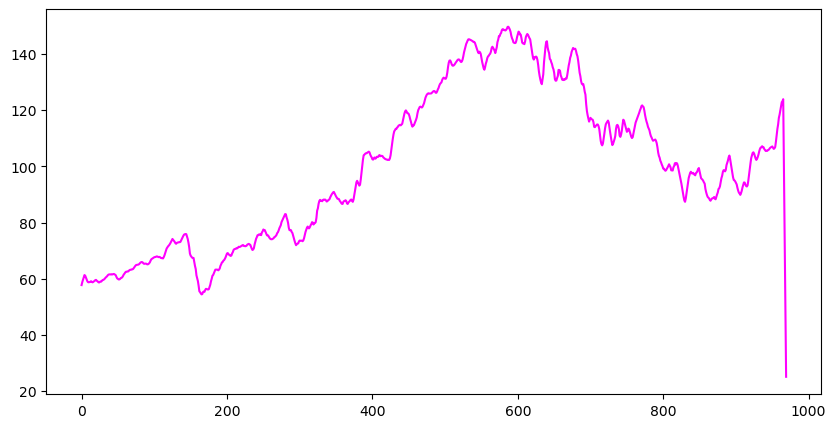

In [355]:
GoogStock["moving_avg"].plot(figsize = (10,5), color = "magenta")

In [356]:
print("The moving average of Google's stock is: ", sum_ma_goog/GoogStock.shape[0])

The moving average of Google's stock is:  99.40095139021741


##  Daily return average of a Google's stock:

In [357]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume,ChangeInStock
Date,,,,,,,
2019-03-04,57.349499,57.914001,56.534500,57.389999,57.389999,28920000,-0.040501
2019-03-05,57.502998,58.480499,57.309750,58.101501,58.101501,28864000,-0.598503
2019-03-06,58.124500,58.378300,57.774502,57.893002,57.893002,21986000,0.231499
2019-03-07,57.785999,57.837749,56.745499,57.165001,57.165001,23332000,0.620998
2019-03-08,56.336498,57.354000,56.165001,57.116001,57.116001,24248000,-0.779503


In [358]:
print("The daily retun average of Google's stock is: ", abs(GOOG["ChangeInStock"]).sum()/GOOG.shape[0])

The daily retun average of Google's stock is:  1.092149179929546


# Adding a new column ‘Trend’ whose values are based on the 'Daily Return'

In [359]:
GOOG.reset_index(inplace=True, drop=False)
GOOG.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ChangeInStock
0,2019-03-04,57.349499,57.914001,56.534500,57.389999,57.389999,28920000,-0.040501
1,2019-03-05,57.502998,58.480499,57.309750,58.101501,58.101501,28864000,-0.598503
2,2019-03-06,58.124500,58.378300,57.774502,57.893002,57.893002,21986000,0.231499
3,2019-03-07,57.785999,57.837749,56.745499,57.165001,57.165001,23332000,0.620998
4,2019-03-08,56.336498,57.354000,56.165001,57.116001,57.116001,24248000,-0.779503


In [360]:
GOOG.rename(columns = {"ChangeInStock" : "Trend"}, inplace = True)
GOOG.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Trend
0,2019-03-04,57.349499,57.914001,56.534500,57.389999,57.389999,28920000,-0.040501
1,2019-03-05,57.502998,58.480499,57.309750,58.101501,58.101501,28864000,-0.598503
2,2019-03-06,58.124500,58.378300,57.774502,57.893002,57.893002,21986000,0.231499
3,2019-03-07,57.785999,57.837749,56.745499,57.165001,57.165001,23332000,0.620998
4,2019-03-08,56.336498,57.354000,56.165001,57.116001,57.116001,24248000,-0.779503


In [361]:
import numpy as np

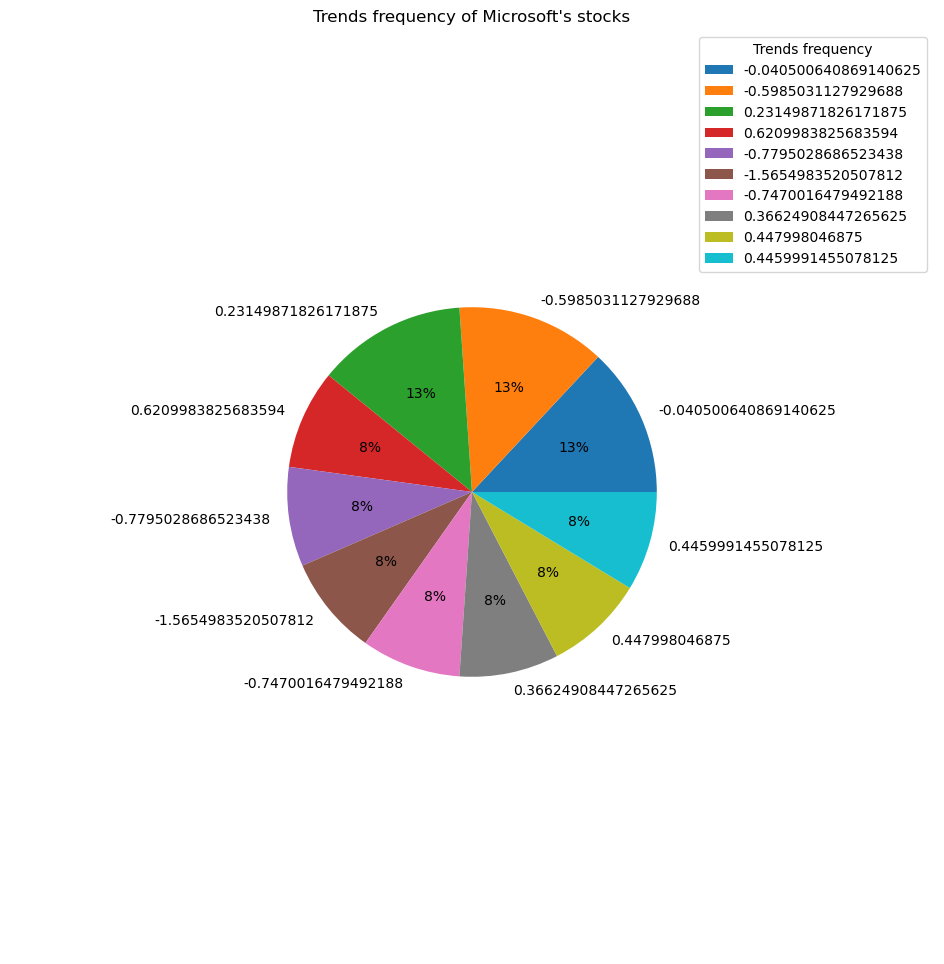

In [362]:
# Visualizing frequency of Trend in Google's stock
plt.figure(figsize = (20,12))
plt.pie(np.array(GOOG["Trend"].value_counts())[0:10], labels = GOOG["Trend"].loc[0:9], autopct='%i%%', radius=0.5)
plt.title("Trends frequency of Google's stocks")
plt.legend(title = "Trends frequency")
plt.show()

### Moving average of Apple's stock:

In [363]:
x = 0
y = 4
sum_ma_aapl = 0
ma_aapl = []   #empty list to catch values in it.

# Taking index value and using it to store values in empty list
for i in AaplStock.index:  
    ma_aapl.append(AaplStock.loc[x : y, 'Open'].sum()/5)
    sum_ma_aapl += AaplStock.loc[x : y, 'Open'].sum()/5  # storing sum of ma
    x += 1
    y += 1

In [364]:
# Creating a new column
ma_aapl
AaplStock["moving_avg"] = ma_aapl
AaplStock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,moving_avg
0,2019-07-22,50.912498,51.807499,50.902500,51.805000,50.262379,89111600,51.807500
1,2019-07-23,52.115002,52.227501,51.822498,52.209999,50.655327,73420800,52.048000
2,2019-07-24,51.917500,52.287498,51.792500,52.167500,50.614094,59966400,52.063000
3,2019-07-25,52.222500,52.310001,51.682499,51.755001,50.213867,55638400,52.500500
4,2019-07-26,51.869999,52.432499,51.785000,51.935001,50.388512,70475600,52.750999


## Daily return average of a Apple's stock:

In [365]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,ChangeInStock
Date,,,,,,,
2019-03-04,43.922501,44.437500,43.492500,43.962502,42.489784,109744800,-0.040001
2019-03-05,43.985001,44.000000,43.634998,43.882500,42.412460,78949600,0.102501
2019-03-06,43.667500,43.872501,43.485001,43.630001,42.168423,83241600,0.037498
2019-03-07,43.467499,43.610001,43.005001,43.125000,41.680340,99185600,0.342499
2019-03-08,42.580002,43.267502,42.375000,43.227501,41.779408,95997600,-0.647499


In [366]:
print("The daily retun average of Apple's stock is: ", abs(AAPL["ChangeInStock"]).sum()/AAPL.shape[0])

The daily retun average of Apple's stock is:  1.4499739327808012


## Adding a new column ‘Trend’ whose values are based on the 'Daily Return'

In [367]:
AAPL.reset_index(inplace=True, drop=False)
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ChangeInStock
0,2019-03-04,43.922501,44.437500,43.492500,43.962502,42.489784,109744800,-0.040001
1,2019-03-05,43.985001,44.000000,43.634998,43.882500,42.412460,78949600,0.102501
2,2019-03-06,43.667500,43.872501,43.485001,43.630001,42.168423,83241600,0.037498
3,2019-03-07,43.467499,43.610001,43.005001,43.125000,41.680340,99185600,0.342499
4,2019-03-08,42.580002,43.267502,42.375000,43.227501,41.779408,95997600,-0.647499


In [368]:
AAPL.rename(columns = {"ChangeInStock" : "Trend"}, inplace = True)
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Trend
0,2019-03-04,43.922501,44.437500,43.492500,43.962502,42.489784,109744800,-0.040001
1,2019-03-05,43.985001,44.000000,43.634998,43.882500,42.412460,78949600,0.102501
2,2019-03-06,43.667500,43.872501,43.485001,43.630001,42.168423,83241600,0.037498
3,2019-03-07,43.467499,43.610001,43.005001,43.125000,41.680340,99185600,0.342499
4,2019-03-08,42.580002,43.267502,42.375000,43.227501,41.779408,95997600,-0.647499


In [ ]:
import numpy as np

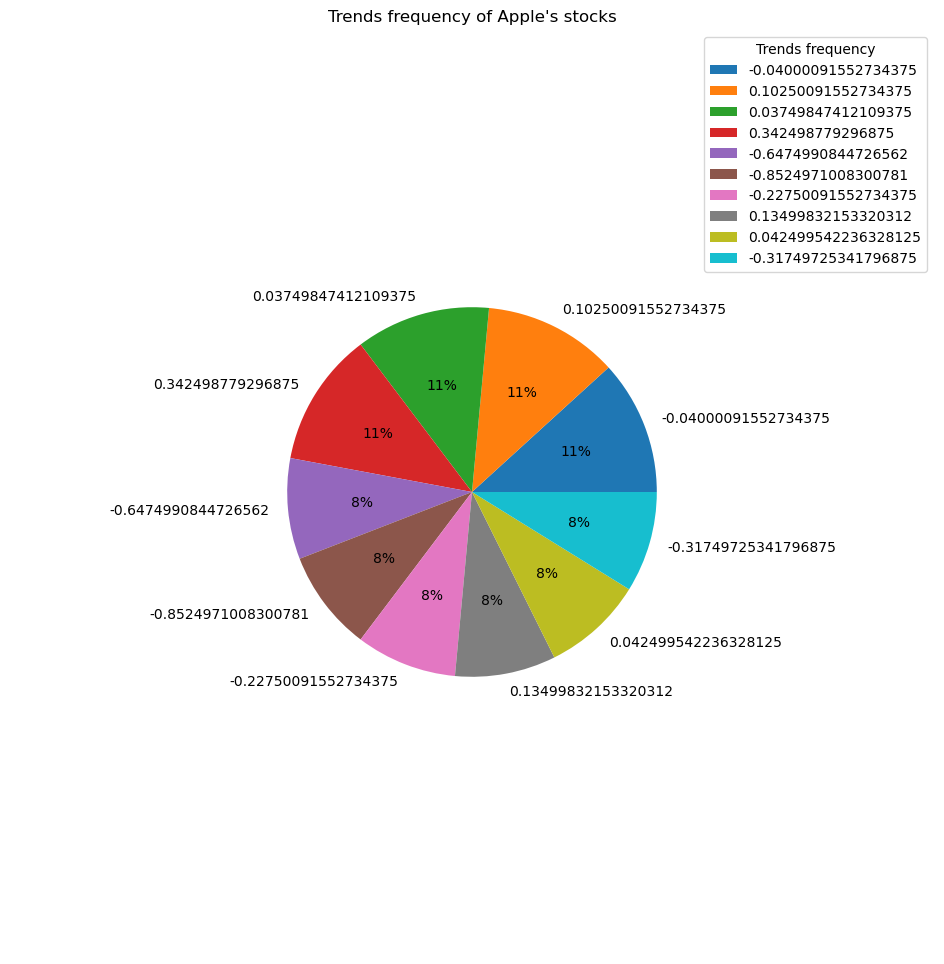

In [369]:
# Visualizing frequency of Trend in Apple's stock
plt.figure(figsize = (20,12))
plt.pie(np.array(AAPL["Trend"].value_counts())[0:10], labels = AAPL["Trend"].loc[0:9], autopct='%i%%', radius=0.5)
plt.title("Trends frequency of Apple's stocks")
plt.legend(title = "Trends frequency")
plt.show()

# Correlation between daily returns of different stocks

In [387]:
# Creating Correlation Dataframe by taking trend columns from each stock Dataframe
Corr_trends = pd.DataFrame([AMZN['Trend'], AAPL['Trend'], GOOG['Trend'], MSFT['Trend']], index = ["AmazonTrend", "AppleTrend", "GoogleTrend", "MicrosoftTrend"])
Corr_trends

,0,1,2,3,4,5,6,7,8,9,...,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048
AmazonTrend,-0.558502,0.526001,1.350998,2.070999,-0.839500,-2.224998,-0.205002,-0.390495,0.249001,-0.467995,...,1.649994,-2.720001,-0.279999,-0.860001,1.450005,2.340004,0.059998,-1.659996,2.280006,2.899994
AppleTrend,-0.040001,0.102501,0.037498,0.342499,-0.647499,-0.852497,-0.227501,0.134998,0.042500,-0.317497,...,-0.369995,-1.830002,-0.559998,0.029999,-0.330002,1.419998,-0.699997,-3.220001,-1.189987,-0.309998
GoogleTrend,-0.040501,-0.598503,0.231499,0.620998,-0.779503,-1.565498,-0.747002,0.366249,0.447998,0.445999,...,1.879997,-0.805000,-1.250000,0.179993,-0.729996,2.000000,1.110001,-3.139999,-0.419998,0.010002
MicrosoftTrend,0.759995,0.550003,0.120003,1.010002,-1.349998,-1.840004,-0.800003,-0.370003,-0.049995,-0.570007,...,3.200012,-2.460022,-0.859985,-0.750000,0.320007,4.089996,1.330017,-8.859985,-3.250000,1.410004


In [390]:
# Using corr() function to get correlation values
Corr_trends.transpose().corr()

,AmazonTrend,AppleTrend,GoogleTrend,MicrosoftTrend
AmazonTrend,1.000000,0.676350,0.703314,0.705887
AppleTrend,0.676350,1.000000,0.689876,0.751623
GoogleTrend,0.703314,0.689876,1.000000,0.785115
MicrosoftTrend,0.705887,0.751623,0.785115,1.000000


<Axes: >

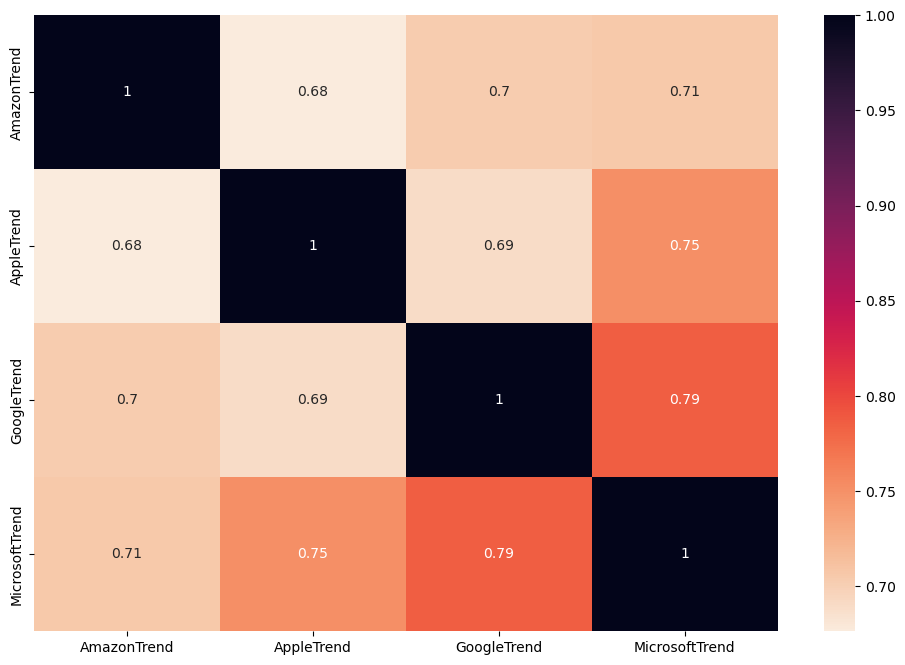

In [400]:
# Correlation between trends of different stocks.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,8))
sns.heatmap(Corr_trends.transpose().corr(), annot = True, cmap = "rocket_r")

## From this correlation analysis chart, we can conclude that Microsoft has the highest correlation with Google and Apple. Also, the stocks are postively correlated to each other.

## -------------------------------------------End of the page-----------------------------------------